In [1]:
NAME = 'Ahmed Hanif - 60301085'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats
import numpy as np

df_verOne = pd.read_csv('Breast_Cancer-Winter2024.csv')
df_verOne.columns = df_verOne.columns.str.replace(' ','_').str.lower()
df_verOne.rename(columns = {'t_stage_' : 't_stage', 'reginol_node_positive': 'regional_node_positive'}, inplace = True)
print('Number Of Rows:',df_verOne.shape[0])
print('Duplicated Rows:', df_verOne.duplicated().sum())
df_verOne.drop_duplicates(inplace=True)
df_verOne.sample(50)

Number Of Rows: 4024
Duplicated Rows: 1


,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
3415,62,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,42.0,Positive,Negative,8,2,69.0,Alive
3434,52,White,Married,T3,N1,IIIA,Well differentiated,1,Regional,52.0,Positive,Positive,7,1,59.0,Alive
807,58,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,45.0,Positive,Positive,14,4,75.0,Alive
2234,46,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,22.0,Positive,Positive,20,1,51.0,Alive
2056,56,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,12.0,Positive,Positive,41,3,98.0,Alive
1102,45,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,18.0,Positive,Positive,21,3,95.0,Alive
1953,65,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,15.0,Positive,Positive,17,2,59.0,Alive
622,49,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,12.0,Positive,Positive,1,1,57.0,Alive
2527,58,White,Separated,T2,N1,IIB,Moderately differentiated,2,Regional,45.0,Positive,Negative,16,3,81.0,Alive
2541,61,Other,Widowed,T2,N1,IIB,Well differentiated,1,Regional,37.0,Positive,Negative,5,2,64.0,Alive


<b>Q1 - a </b>

In [3]:
total_count_of_each_race = df_verOne['race'].value_counts()
print(total_count_of_each_race)

race
White    3412
Other     320
Black     291
Name: count, dtype: int64


In [4]:
death_count_of_each_race = df_verOne['race'][df_verOne['status'] == 'Dead'].value_counts()
print(death_count_of_each_race)

race
White    510
Black     73
Other     33
Name: count, dtype: int64


In [5]:
total_death_cases = (df_verOne['status'] == 'Dead').sum()
print(total_death_cases)

616


In [6]:
death_percentage_of_each_race = round((death_count_of_each_race / total_death_cases) * 100,2)
print(death_percentage_of_each_race)

race
White    82.79
Black    11.85
Other     5.36
Name: count, dtype: float64


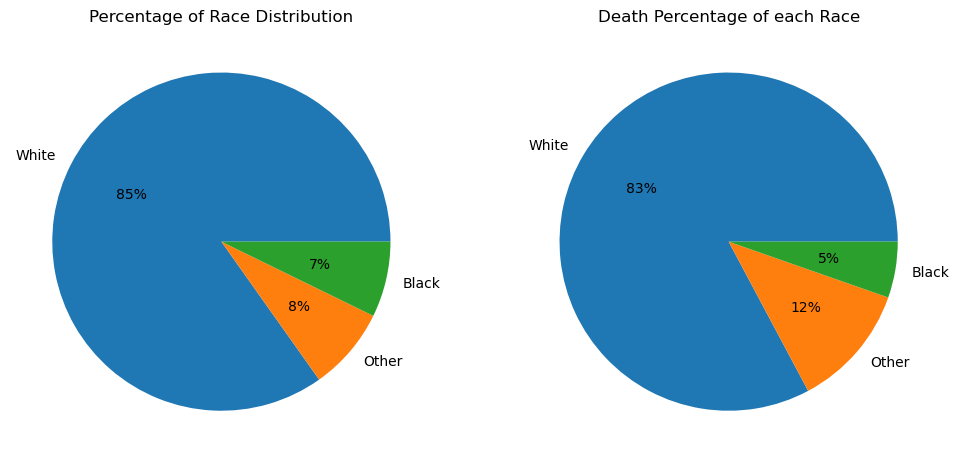

In [7]:
plt.figure(figsize=(12,8));
plt.subplot(1,2,1)
plt.pie(total_count_of_each_race, labels = df_verOne['race'].value_counts().index, autopct='%.0f%%', );
plt.title("Percentage of Race Distribution");


plt.subplot(1,2,2)
plt.pie(death_count_of_each_race, labels = df_verOne['race'].value_counts().index, autopct='%.0f%%', );
plt.title("Death Percentage of each Race");

<b> Q1 - b </b>

In [8]:
descriptive_stats_of_data = round(df_verOne.describe().T,2)
descriptive_stats_of_data

,count,mean,std,min,25%,50%,75%,max
age,4023.0,53.97,8.96,30.0,47.0,54.0,61.0,69.0
tumor_size,4017.0,30.43,21.16,0.0,16.0,25.0,38.0,140.0
regional_node_examined,4023.0,14.36,8.10,1.0,9.0,14.0,19.0,61.0
regional_node_positive,4023.0,4.16,5.11,1.0,1.0,2.0,5.0,46.0
survival_months,4016.0,71.18,23.09,0.0,56.0,73.0,90.0,107.0


<p><b>Age:</b></p>
<p>    The average age of the patients is almost 54 years old. 25% of the patients are below 47 years of age, whereas 75% of the patients are above 61. The Maximum age of the patient is 69</p>
<p><b>tumor_size:</b></p>
<p>    The average tumour size among the patients was found to be 30.42. The minimum size of the tumour is 0mm and the maximum size is 140mm.25% of the patients had a tumor size of less that 16mm while 25% of the patients had tumor size of greater than 38mm.</p>
<p><b>regional_node_examined and regional_node_positive:</b></p>
<p>    The average of 14.36 patients had their regional node examined, out of which it returned positive for 4.16 of the patients. The maximum of the regional nodes that were examined are 75. And the maximum that came back positive are 46</p>
<p><b>survival_months: </b></p>
<p>    The average number of months that patients survived after being diagnosed is 71. 25% of the patients survived for less than 56 months whereas 90% of the patients survived for 90 months. The maximum time that any patient survived is 107 months, which are approximately 9 years</p>

<b>Q1 - c</b>

In [9]:
numerical_columns = df_verOne.select_dtypes(include = [np.number])
skew_and_kurtosis = round(numerical_columns.agg(['skew','kurtosis']).T,2)
skew_and_kurtosis

,skew,kurtosis
age,-0.22,-0.75
tumor_size,1.74,3.62
regional_node_examined,0.83,1.65
regional_node_positive,2.70,8.98
survival_months,-0.61,0.07


In [10]:
def calculate_bin_edges(column, bin_boundary):
    return np.arange(0,column.max() + bin_boundary, bin_boundary)

/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: F

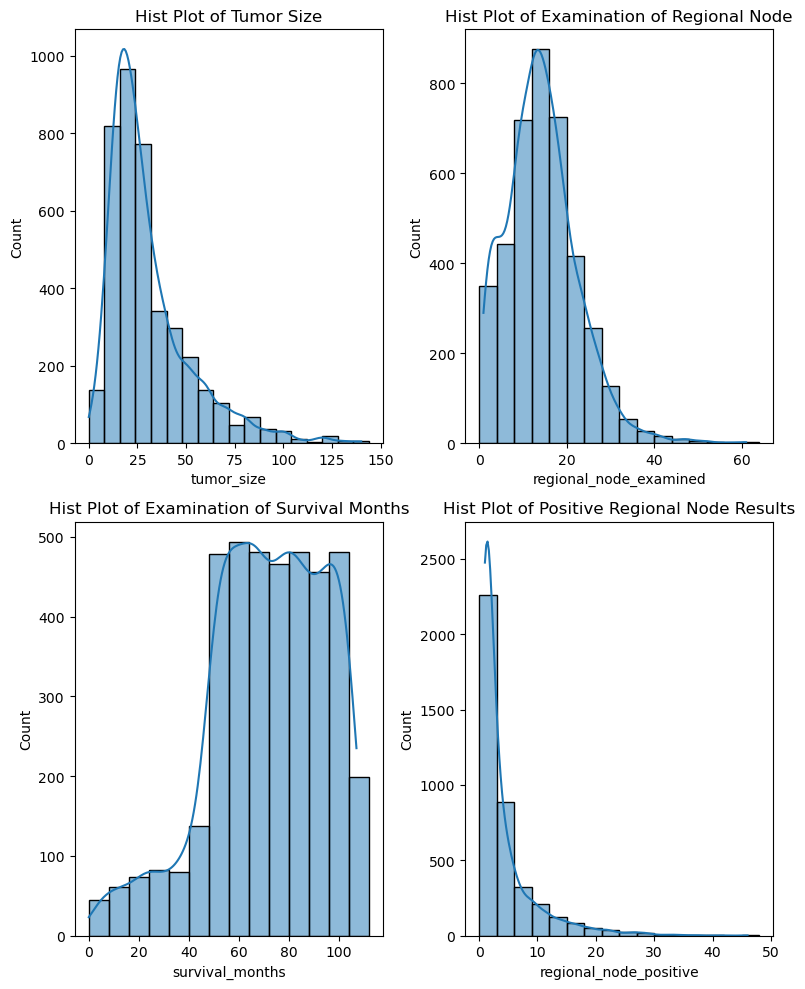

In [11]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sb.histplot(numerical_columns.tumor_size, kde= True, bins = calculate_bin_edges(numerical_columns.tumor_size,8));
plt.title('Hist Plot of Tumor Size');

plt.subplot(2,2,2)
sb.histplot(numerical_columns.regional_node_examined, kde = True,bins = calculate_bin_edges(numerical_columns.regional_node_examined,4))
plt.title('Hist Plot of Examination of Regional Node')

plt.subplot(2,2,3)
sb.histplot(numerical_columns.survival_months, kde = True, bins = calculate_bin_edges(numerical_columns.survival_months,8))
plt.title('Hist Plot of Examination of Survival Months')

plt.subplot(2,2,4)
sb.histplot(numerical_columns.regional_node_positive, kde = True, bins = calculate_bin_edges(numerical_columns.regional_node_positive,3))
plt.title('Hist Plot of Positive Regional Node Results')

plt.tight_layout();

<b> Comments of the Results </b>

<b> Q2 </b>

In [12]:
medical_variables = ['t_stage', 'n_stage', '6th_stage','differentiate','grade','a_stage','tumor_size','estrogen_status','progesterone_status','regional_node_examined','regional_node_positive' ]
dead_patients = df_verOne[df_verOne['status'] == 'Dead']

<Axes: xlabel='race', ylabel='count'>

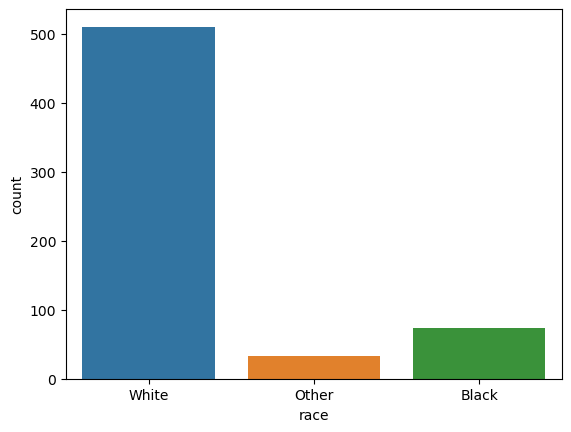

In [13]:
sb.countplot(data = dead_patients, x = 'race')

<Axes: xlabel='marital_status', ylabel='count'>

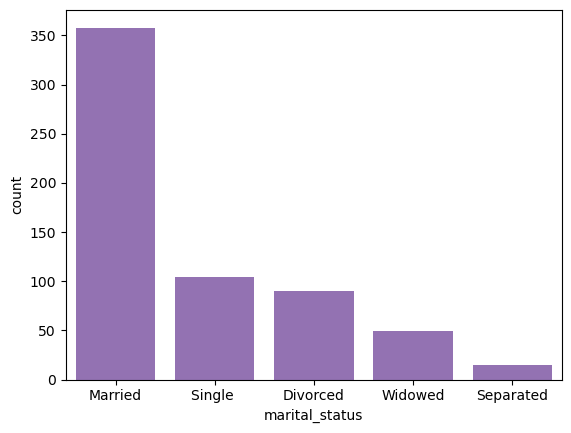

In [14]:
type_order = dead_patients['marital_status'].value_counts().index
color = sb.color_palette()[4]
sb.countplot(dead_patients,x = 'marital_status', order = type_order, color = color)

<b>Q3 - Multivariate Plots</b>

<b> Q4 - Identifying and Removing Outliers </b>

In [15]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df['column'].quantile(0.25)
        Q3 = df['column'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
df_verTwo = df_verOne.copy()

In [16]:
numerical_columns.columns.tolist()

['age',
 'tumor_size',
 'regional_node_examined',
 'regional_node_positive',
 'survival_months']

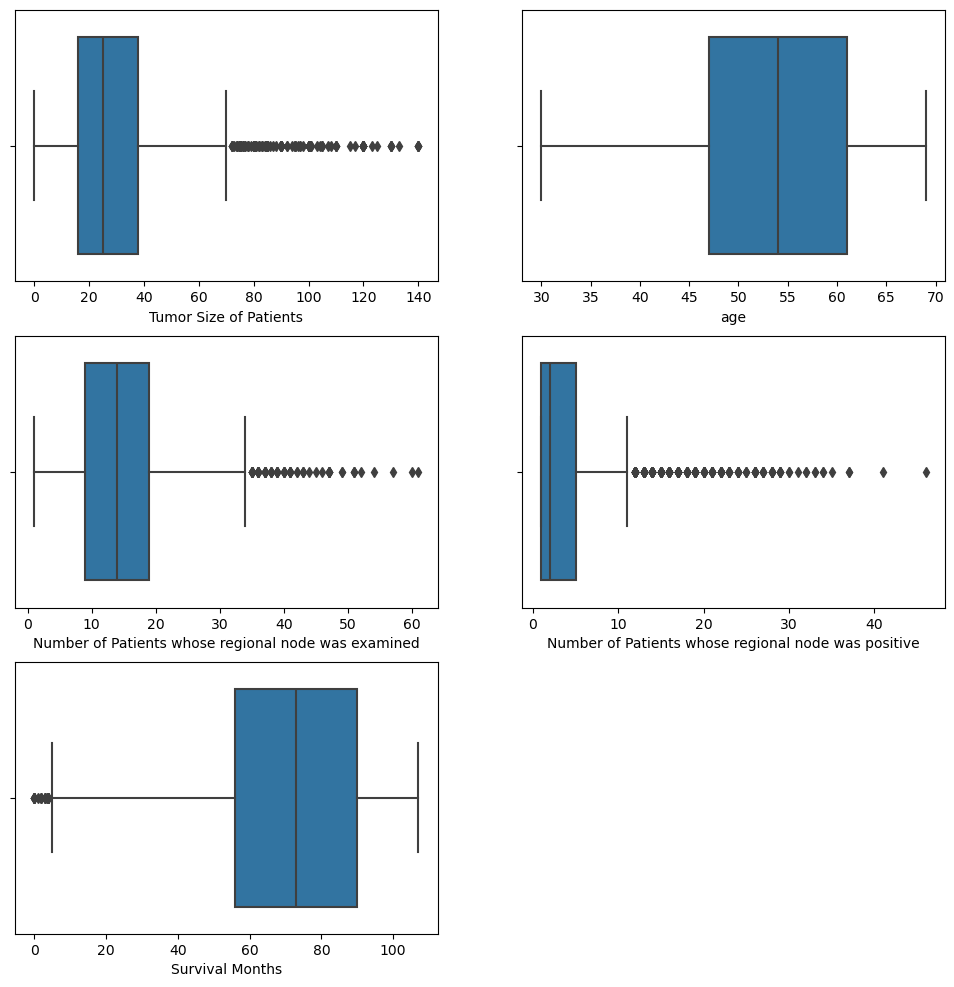

In [17]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
sb.boxplot(data = df_verTwo, x = df_verTwo['tumor_size'], ax=ax[0, 0])
ax[0,0].set_xlabel('Tumor Size of Patients')

sb.boxplot(data = df_verTwo, x = df_verTwo['age'], ax = ax[0,1])
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_examined'], ax = ax[1,0])
ax[1,0].set_xlabel('Number of Patients whose regional node was examined')
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_positive'], ax = ax[1,1])
ax[1,1].set_xlabel('Number of Patients whose regional node was positive')
sb.boxplot(data = df_verTwo, x = df_verTwo['survival_months'], ax = ax[2,0])
ax[2,0].set_xlabel('Survival Months')

ax[2,1].axis('off');

In [18]:
from scipy.stats.mstats import winsorize
# df_verTwo['tumor_size'] = winsorize(df_verTwo['tumor_size'], limits=[0.08,0.08]) #8% top and 8% bottom replaced by 92th and 8th percentile respectively
df_verTwo['regional_node_examined'] = winsorize(df_verTwo['regional_node_examined'], limits = [0,0.1])
df_verTwo['regional_node_positive'] = winsorize(df_verTwo['regional_node_positive'], limits = [0,0.1])
df_verTwo['survival_months'] = winsorize(df_verTwo['survival_months'], limits = [0.05,0])

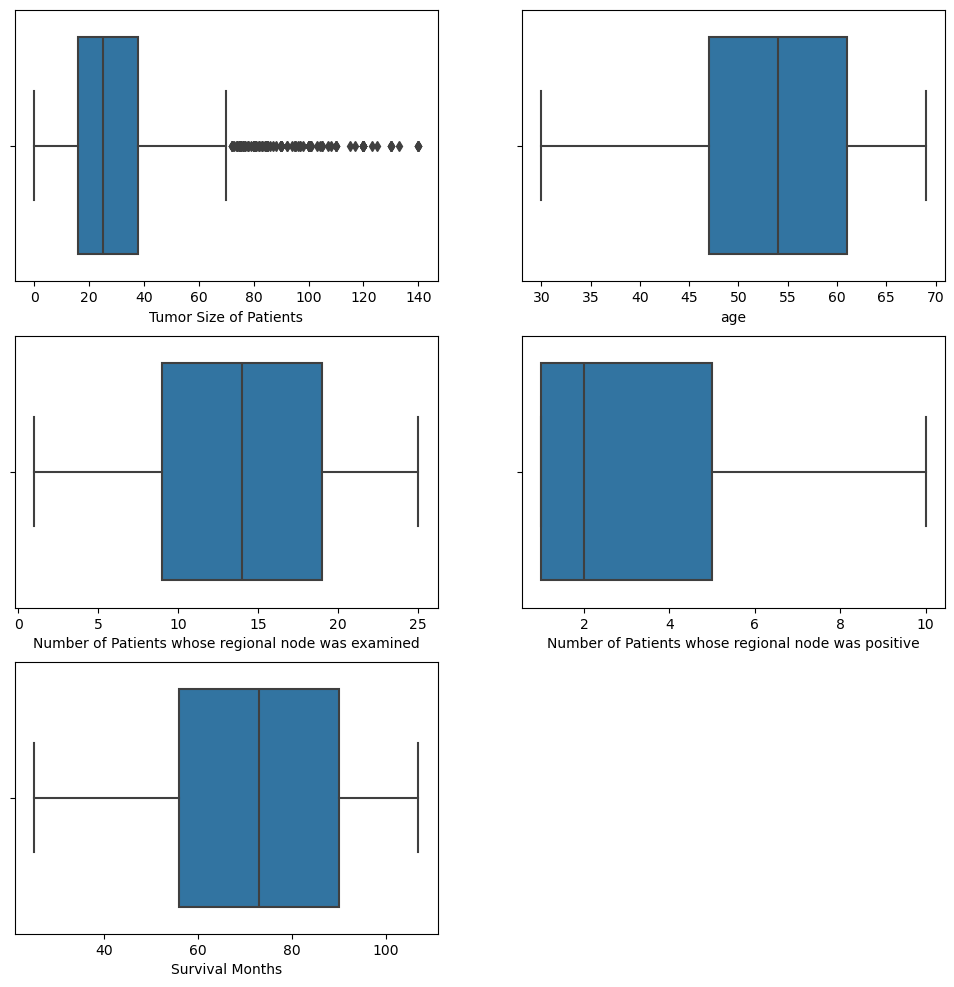

In [19]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
sb.boxplot(data = df_verTwo, x = df_verTwo['tumor_size'], ax=ax[0, 0])
ax[0,0].set_xlabel('Tumor Size of Patients')

sb.boxplot(data = df_verTwo, x = df_verTwo['age'], ax = ax[0,1])
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_examined'], ax = ax[1,0])
ax[1,0].set_xlabel('Number of Patients whose regional node was examined')
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_positive'], ax = ax[1,1])
ax[1,1].set_xlabel('Number of Patients whose regional node was positive')
sb.boxplot(data = df_verTwo, x = df_verTwo['survival_months'], ax = ax[2,0])
ax[2,0].set_xlabel('Survival Months')

ax[2,1].axis('off');

<b>Q5 - Treating Missing Values</b>

In [20]:
df_verTwo.isna().sum()

age                       0
race                      0
marital_status            0
t_stage                   5
n_stage                   0
6th_stage                 0
differentiate             6
grade                     0
a_stage                   0
tumor_size                6
estrogen_status           0
progesterone_status       0
regional_node_examined    0
regional_node_positive    0
survival_months           7
status                    0
dtype: int64

In [21]:
df_verTwo['t_stage'] = df_verTwo['t_stage'].fillna(df_verTwo['t_stage'].mode().iat[0])
df_verTwo['differentiate'] = df_verTwo['differentiate'].fillna(df_verTwo['differentiate'].mode().iat[0])
df_verTwo['survival_months'] = df_verTwo['survival_months'].fillna(df_verTwo['survival_months'].mean())
df_verTwo.isna().sum().sum()

6

<b>Q6 - Impute Zeroes</b>

In [22]:
# '0' in df_verTwo['progesterone_status'][df_verTwo['progesterone_status'] == '0'].values.astype('int')

In [23]:
columns = df_verTwo.columns.tolist()
toImpute = []
for column in columns:
    if '0' in (df_verTwo[column][(df_verTwo[column] == '0') | (df_verTwo[column] == 0)].values).astype('str'):
        toImpute.append(column)
print(df_verTwo[toImpute].value_counts())
df_verTwo[toImpute] = df_verTwo[toImpute].replace('0','Negative')
print('After Imputing:','0' in df_verTwo[toImpute][df_verTwo[toImpute] == '0'].values.astype('str'))

progesterone_status
Positive               3321
Negative                697
0                         5
Name: count, dtype: int64
After Imputing: False


<div>
    <b> Explanation </b>
    <ul>
        <li>
                <p> progesterone_status column has three types of values. Since the negative value already exists, we don't have a need for the '0' value as they both represent the same thing. Hence, we will be imputing that with negative </p>
        </li>

</div>


In [24]:
df_verTwo[['t_stage', 'tumor_size']][df_verTwo['tumor_size'] == 0].size

12

<p>Tumor from stage 1 onwards don't have a tumor size of zero. Hence we will be imputing these values</p>(Breast Cancer Tumor Size Chart & Measurement Explained, n.d.)

In [25]:
df_verTwo['tumor_size'] = winsorize(df_verTwo['tumor_size'], limits = [0.08,0.08])
df_verTwo[['t_stage', 'tumor_size']][df_verTwo['tumor_size'] == 0].size

0

<b> Q7 - Rescale </b>

<b>Q8 - Feature Engineering and Feature Removal</b>

------------------------------

<h1> References</h1>

<p>Breast cancer tumor size chart & measurement explained. (n.d.). City of Hope. https://www.cancercenter.com/cancer-types/breast-cancer/stages/tumor-size-chart </p>